# ***Exploring Used Car Pricing and Ownership Patterns***

### Context
In today's fast-paced world, the automotive industry is constantly evolving, and the market for used cars plays a crucial role in providing affordable and accessible transportation options. Understanding the dynamics of this market is essential for both buyers and sellers alike. This dataset, "Exploring Used Car Pricing and Ownership Patterns," offers a comprehensive collection of information on various used cars available for sale. By delving into this dataset, we can gain valuable insights into how different factors such as manufacturing year, mileage, fuel type, seller type, transmission, and ownership history impact the pricing and desirability of these vehicles.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from summarytools import dfSummary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [2]:
# Importing the Dataset
Data = pd.read_csv(r"C:\Users\Deepak Chaudhary\Downloads\car_details.csv")
Data.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
1840,Maruti Swift ZXI BSIV,2016,670000,7104,Petrol,Trustmark Dealer,Manual,First Owner
2370,Maruti SX4 S Cross DDiS 320 Delta,2015,325000,80000,Diesel,Individual,Manual,First Owner
3846,Datsun RediGO AMT 1.0 S,2018,300000,25000,Petrol,Individual,Automatic,First Owner
1224,Maruti Vitara Brezza VDi,2018,780000,50000,Diesel,Individual,Manual,First Owner
3174,Hyundai i10 Magna,2008,195000,56000,Petrol,Individual,Manual,Second Owner


### About the Dataset
This dataset appears to represent a collection of used cars for sale, each described by several attributes. Here's a breakdown of the information provided in the dataset:

* Name: The make and model of the car.
* Year: The manufacturing year of the car.
* Selling Price: The price at which the car is being offered for sale.
* Kilometers Driven: The number of kilometers the car has been driven.
* Fuel: The type of fuel the car uses (e.g., Diesel, Petrol).
* Seller Type: Indicates whether the seller is an individual or a dealer.
* Transmission: The type of transmission the car has (e.g., Manual, Automatic).
* Owner: The number of previous owners the car has had.

The dataset includes various cars from different years, with different selling prices, mileage, fuel types, seller types, transmission types, and ownership histories. This dataset could be useful for analyzing the used car market trends, estimating the value of cars based on their attributes, or building predictive models related to car pricing and ownership patterns.


In [3]:
dfSummary(Data)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,name[object],1. Maruti Swift Dzire VDI2. Maruti Alto 800 LXI3. Maruti Alto LXi4. Maruti Alto LX5. Hyundai EON Era Plus6. Maruti Swift VDI BSIV7. Maruti Wagon R VXI BS IV8. Maruti Swift VDI9. Hyundai EON Magna Plus10. Maruti Wagon R LXI Minor11. other,"69 (1.6%)59 (1.4%)47 (1.1%)35 (0.8%)35 (0.8%)29 (0.7%)29 (0.7%)27 (0.6%)24 (0.6%)24 (0.6%)3,962 (91.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADu0lEQVR4nO3cQU4bWRhG0d+WlW4mZVmWWAYLYBEsNotgAewDIWrQpJm4ByHzGMkXtXPOHKkGV8926X1sTqfTQGH71Q/An0NsZMRGRmxkxEZGbGTERkZsZMRGZjMzNzPzbWbeT6fT2xc/D1dsdzweH5ZlOazr+rLZbL4LjkvZLstyuLu7m2VZDvPzhIOL2M7M3Nzc/PvVD8L18wOBjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjNjIbGdm3t7e/vrqB+H6bdd1fXl6epp1XV9m5v2rH4jrZYNAZuNfZlFxspGxriJjXUXGuoqMl7pkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkDF7IGLyQcS2cjMELGScbGYMXMgYvZAxeyHipS0ZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxnXwskYvJDxA4HMr4/R8RHKpe2Ox+PDzIxlFZe2XZblYFlFwXc2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyu49V1YxlFRfmWjgZ6yoyTjYyBi9kDF7IePVBRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMa+FkDF7IONnIGLyQMXgh49UHGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZGxriJjg0DGuoqMk42MdRUZ6yoyXn2QERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZExeCHjWjgZgxcyTjYyBi9kDF7IePVBRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEbG4IWMa+FkDF7I+M5GxscoGesqMtZVZHxnIyM2MmIjIzYyYiMjNjJiIyM2MmIjIzYyYiMjNjJiIyM2MmIjY11FxrVwMtZVZJxsZAxeyBi8kPHqg4zYyIiNjNjIiI2M2MiIjYzYyIiNjNjIiI2M2MiIjYzYyIiNjMELGdfCyRi8kPl1srkSzrnez/003B2Px4ePDQL8tnVdX84dSe2WZTnc39+/7ff7H5d8OK7H6+vr34+Pj4fn5+dvM/P7sc3M7Pf7H7e3t/9c7Om4Rjfn/oH3bGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGR2Mz+vjHz1g/D/8dleduu6vjw+Ph7mE1dG+HN9DKXOGkm5Fs5nnX0t3OCFjB8IZMRGRmxkxEZGbGTERkZsZMRGRmxk/gPIbEJwXwiDdAAAAABJRU5ErkJggg=="">",0(0.0%)
2,year[int64],Mean (sd) : 2013.1 (4.2)min < med < max:1992.0 < 2014.0 < 2020.0IQR (CV) : 5.0 (477.6),27 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAACj0lEQVR4nO3du47aQBSA4ZmwkOEiW1wCHS+wEgUSDQ+QMg+bR0hBkZqWig6BkBHOOhjjFFGkVbSBtceO51j/V+/AFL9WgzHHOk1TBbjuQ9UbAN7jqeoNwB1a67ZSqmXxEpc0TV+K2s9rhAql1O9Ih8PhF8/z+nlf43Q6HbXWX8uIlVDxR8vzvP5yuXzxfT/KujgIArNarfqHw6GllCJUlMv3/Wg8Hv/Iubxd6GZeIdSasThnerfbrVn0fopCqDVic86M49gkSfIcRdE3pVTe/6ilIdR6yX3O3G63/fV63bler42yNmeDUGsozznzeDyWdr4sAhf8IQKhQgRChQiEChEIFSIQKkQgVIhAqBCBUCECoUIEQoUIhAoRCBUiECpEIFSIQKgQgVAhAqFCBEKFCIQKEQgVIhAqRODn0o6xnKjn9LQTG4TqENuJeq5PO7FBqG6xmqjn+rQTG4TqoLwT9VyfdmKDUFGYJEmaSilPa51n+d1p1YSKQoRh2IzjeDadThuNRiPzseXRtGpCRSEul8uTMaYzn8+jyWRyzLL2PdOqCRWF6na7eSdW3z1fc8EfIhAqRCBUiECoEIFQIQKhQgRChQiEChG44F+Cuj49r0qEWrA6Pz2vSoRavNo+Pa9KhFqSOj49r0p8mIIIhAoRCBUiECpEIFSIQKgQgVAhAqFCBEKFCIQKEfgK9R+4A8othPoG7oByD6G+jTugHEOod3AHlDtqGyqTm+vF6VAtYjODweCz7/vdPO/LOdM9zoZq+4FGKfW8WCy+j0ajU9b1nDPd8zBUrbVRSn38D3v5m9fr9T7NZrNru93+mWXhfr83m82mkySJVWhhGJrdbtfJsuZ8Ppsq1kp+7yAIzKO/+QWzeSIaD+F/TQAAAABJRU5ErkJggg=="">",0(0.0%)
3,selling_price[int64],Mean (sd) : 504127.3 (578548.7)min < med < max:20000.0 < 350000.0 < 8900000.0IQR (CV) : 391250.2 (0.9),445 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAKoAAABGCAYAAABc8A97AAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAAB7klEQVR4nO3XwYraUBSH8XOqI3GkCSLEnY/QhUsfog872+7zLCIEvcGMaURud92U1vFm0vbffr91zuFCPszVY4wG/O0+/OkDAG8xvfeAu8/NbJa4v48xXhJnge9+Gaq7z1er1ec8z5cpy5umObr7C7FiqHu/qLM8z5e73e5SFEX3yOIQQlZV1bKu65mZESoGufvpNzMriqIry/I1Yf88YQb4AX+mIIFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIYFQIWE65vLb7fZkZrm7

### Data Preprocessing

In [4]:
# Checking for null values
Data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

The dataset appears to be complete, with no missing values in any of the columns.

In [5]:
# Checking for Duplicate rows
Data[Data.duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
13,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
14,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
15,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
16,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
17,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4307,Mahindra Xylo H4,2019,599000,15000,Diesel,Individual,Manual,Third Owner
4308,Maruti Alto 800 LXI,2018,200000,35000,Petrol,Individual,Manual,First Owner
4309,Datsun GO Plus T,2017,350000,10171,Petrol,Dealer,Manual,First Owner
4310,Renault Duster 110PS Diesel RxL,2015,465000,41123,Diesel,Dealer,Manual,First Owner


We will drop the duplicate rows because duplicate rows can lead to skewed analysis results and inaccurate insights. Removing duplicates ensures that your analysis is based on accurate and reliable data

In [6]:
# Droping duplicates
Data.drop_duplicates(inplace = True)

In [7]:
# Reseting Index
Data.reset_index(inplace = True,drop = True)

In [8]:
Data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3572,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
3573,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3574,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3575,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [9]:
# Checking for Outliers in the Selling_Price column using IQR method
Q1 = Data['selling_price'].quantile(0.25)
Q3 = Data['selling_price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = Data.loc[Data[(Data['selling_price'] < lower_bound) | (Data['selling_price'] > upper_bound)].index.values].index.values.tolist()
print("Outliers:")
print(outliers)
print("Total:",len(outliers))

Outliers:
[12, 16, 17, 22, 23, 26, 27, 30, 31, 76, 81, 83, 88, 89, 90, 92, 150, 178, 191, 205, 214, 275, 277, 304, 306, 307, 385, 396, 417, 447, 512, 519, 521, 522, 524, 535, 536, 538, 539, 540, 547, 549, 569, 645, 655, 667, 680, 693, 694, 751, 758, 760, 828, 842, 846, 851, 852, 858, 871, 892, 895, 904, 927, 939, 941, 942, 949, 968, 1015, 1060, 1072, 1145, 1147, 1160, 1168, 1182, 1263, 1267, 1274, 1298, 1318, 1326, 1332, 1333, 1375, 1433, 1464, 1487, 1535, 1537, 1551, 1607, 1609, 1626, 1707, 1763, 1808, 1810, 1888, 1897, 1899, 1984, 1988, 2021, 2022, 2067, 2119, 2136, 2139, 2195, 2210, 2293, 2304, 2307, 2381, 2403, 2408, 2409, 2426, 2562, 2579, 2580, 2581, 2592, 2609, 2733, 2736, 2755, 2765, 2789, 2804, 2845, 2876, 2881, 2883, 2923, 2940, 2941, 2942, 2958, 2997, 3018, 3097, 3126, 3165, 3183, 3191, 3200, 3236, 3240, 3248, 3251, 3257, 3258, 3259, 3260, 3267, 3282, 3341, 3385, 3387, 3396, 3430, 3470, 3477, 3487, 3491, 3510, 3514, 3550]
Total: 170


In [10]:
# Removing outliers helps ensure the accuracy and integrity of your dataset.
Data.drop(outliers,inplace = True)

### With this dataset, we might have a better insight on following questions
* How does the selling price correlate with the number of kilometers a car has been driven?
* Do cars using different fuel types have distinct selling price distributions?
* Is there a difference in selling prices between cars sold by individuals and those sold by dealers?
* How does the number of previous owners impact the selling price of a used car?
* Do cars with automatic transmissions generally command higher selling prices compared to manual transmissions?
* How have average selling prices for used cars changed over different years?

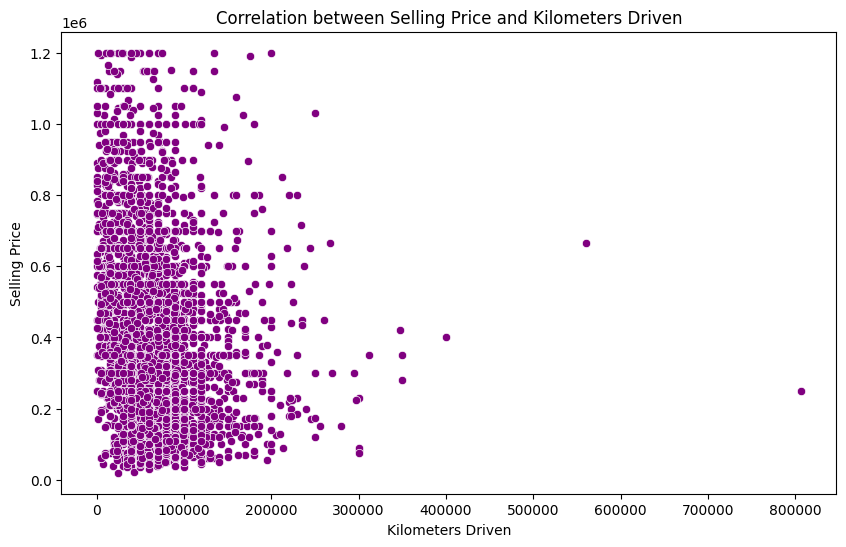

In [12]:
# How does the selling price correlate with the number of kilometers a car has been driven?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=Data,color = 'purple')
plt.title('Correlation between Selling Price and Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

The above plot shows very weak relationship between selling_price and km_driven

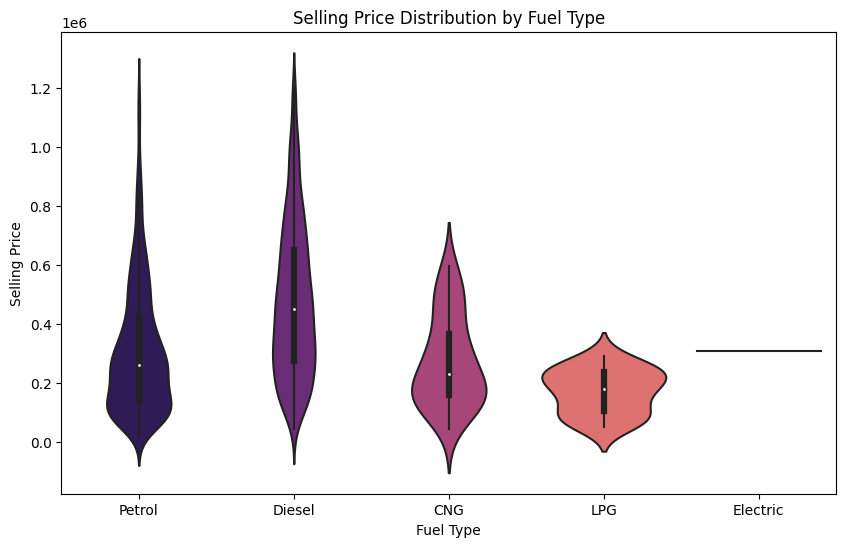

In [13]:
# Do cars using different fuel types have distinct selling price distributions?
plt.figure(figsize=(10, 6))
sns.violinplot(x='fuel', y='selling_price', data=Data, palette='magma')
plt.title('Selling Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

The selling price of petrol and diesel type vehicles as comparatively high as compare to other Fuel Types  
There are outliers in the dataset we need to remove the outliers from the Selling Price column

In [14]:
# Calculating the average car price based on fuel type
Data.groupby('fuel')['selling_price'].mean()

fuel
CNG         273162.081081
Diesel      479578.237864
Electric    310000.000000
LPG         171818.136364
Petrol      312302.078870
Name: selling_price, dtype: float64

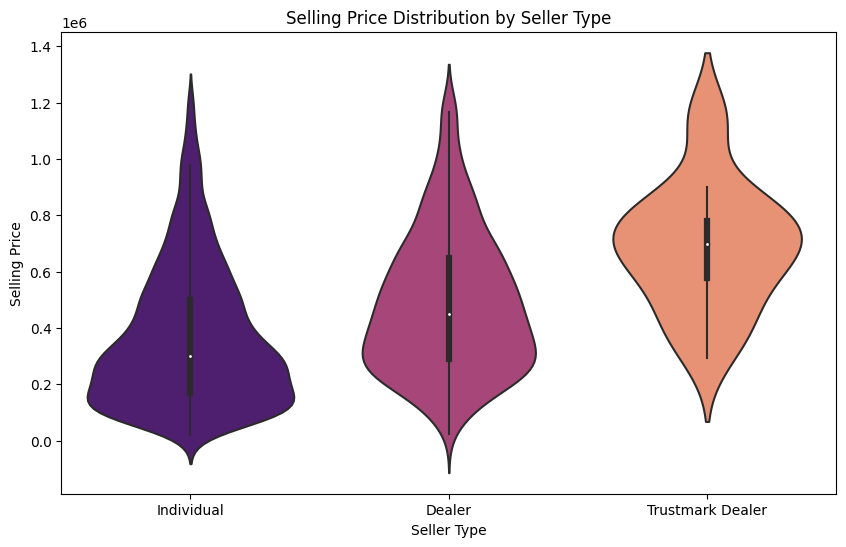

In [15]:
# Is there a difference in selling prices between cars sold by individuals and those sold by dealers?
plt.figure(figsize=(10, 6))
sns.violinplot(x='seller_type', y='selling_price', data=Data,palette = 'magma')
plt.title('Selling Price Distribution by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.show()

In [16]:
# Calculating the average car price based on seller type
Data.groupby('seller_type')['selling_price'].mean()

seller_type
Dealer              487659.391641
Individual          365955.766020
Trustmark Dealer    689666.666667
Name: selling_price, dtype: float64

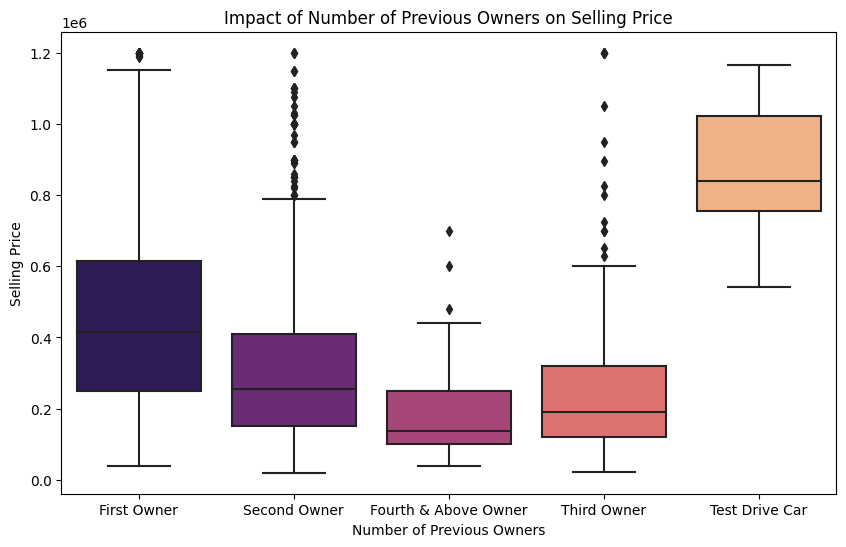

In [17]:
# How does the number of previous owners impact the selling price of a used car?
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=Data,palette = 'magma')
plt.title('Impact of Number of Previous Owners on Selling Price')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Selling Price')
plt.show()

In [18]:
# Calculating the average car price based on owner
Data.groupby('owner')['selling_price'].mean()

owner
First Owner             453022.635311
Fourth & Above Owner    181213.293333
Second Owner            312356.405208
Test Drive Car          871999.785714
Third Owner             246898.589474
Name: selling_price, dtype: float64

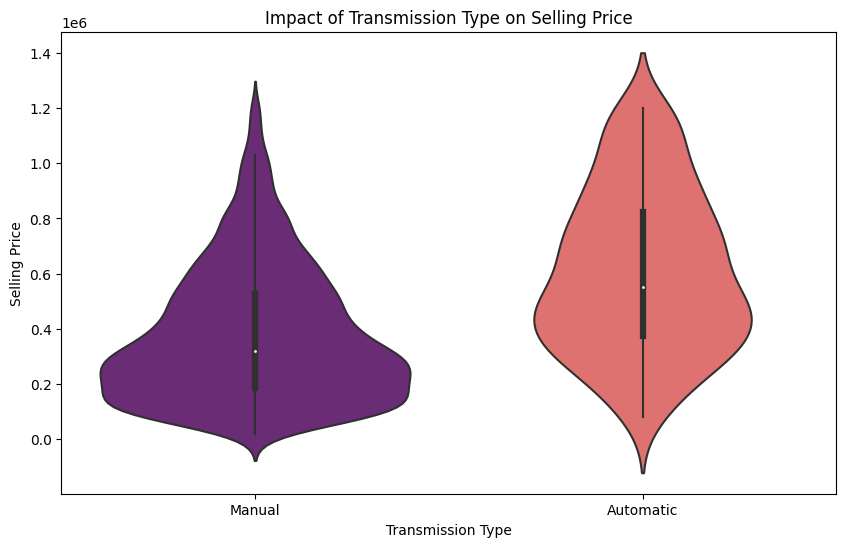

In [19]:
# Do cars with automatic transmissions generally command higher selling prices compared to manual transmissions?
plt.figure(figsize=(10, 6))
sns.violinplot(x='transmission', y='selling_price', data=Data,palette = 'magma')
plt.title('Impact of Transmission Type on Selling Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()

In [20]:
# Calculating the average car price based on owner
avg_prices_by_year = Data.groupby('transmission')['selling_price'].mean()
print(avg_prices_by_year)

transmission
Automatic    605559.970000
Manual       378556.647958
Name: selling_price, dtype: float64


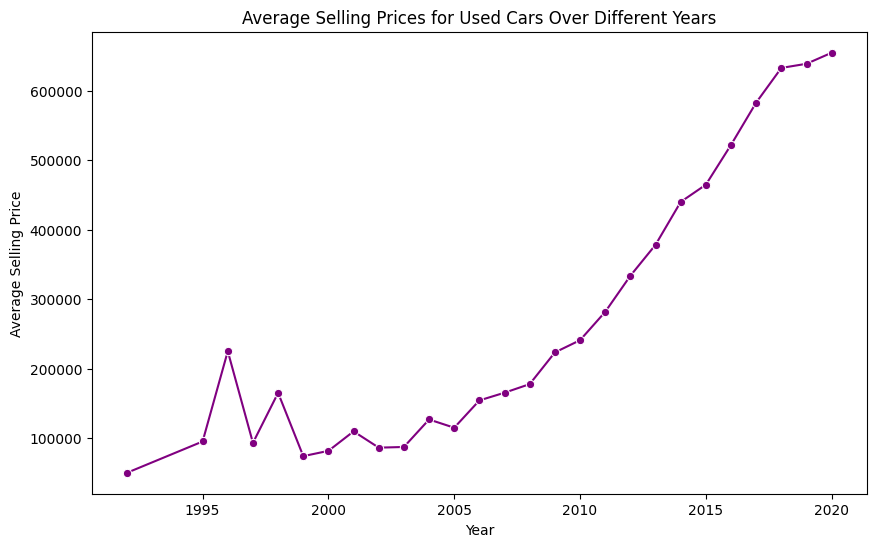

In [25]:
# How have average selling prices for used cars changed over different years?
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='selling_price', data=avg_prices_by_year, marker='o',color = 'purple')
plt.title('Average Selling Prices for Used Cars Over Different Years')
plt.xlabel('Year')
plt.ylabel('Average Selling Price')
plt.show()

In [26]:
# Calculate average selling prices by year
avg_prices_by_year = Data.groupby('year')['selling_price'].mean().reset_index()
avg_prices_by_year

,year,selling_price
0,1992,50000.000000
1,1995,95000.000000
2,1996,225000.000000
3,1997,93000.000000
4,1998,165111.111111
5,1999,73888.888889
6,2000,81500.000000
7,2001,109562.437500
8,2002,86111.111111
9,2003,87090.909091


### Feature Engeneering

In [27]:
# Creating new column 'Company'
Data['Company'] = Data['name'].str.split().str[0]

In [28]:
# Droping the 'name' column
Data.drop(['name'],axis = 1,inplace = True)
Data.sample(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Company
629,2010,330000,124000,Diesel,Individual,Manual,Second Owner,Chevrolet
2090,2009,130000,80000,Petrol,Individual,Manual,Second Owner,Maruti
1481,2005,80000,40000,Petrol,Individual,Manual,Second Owner,Maruti
2441,2015,245000,43000,Petrol,Dealer,Manual,First Owner,Chevrolet
2039,2018,550000,31000,Petrol,Dealer,Manual,First Owner,Hyundai


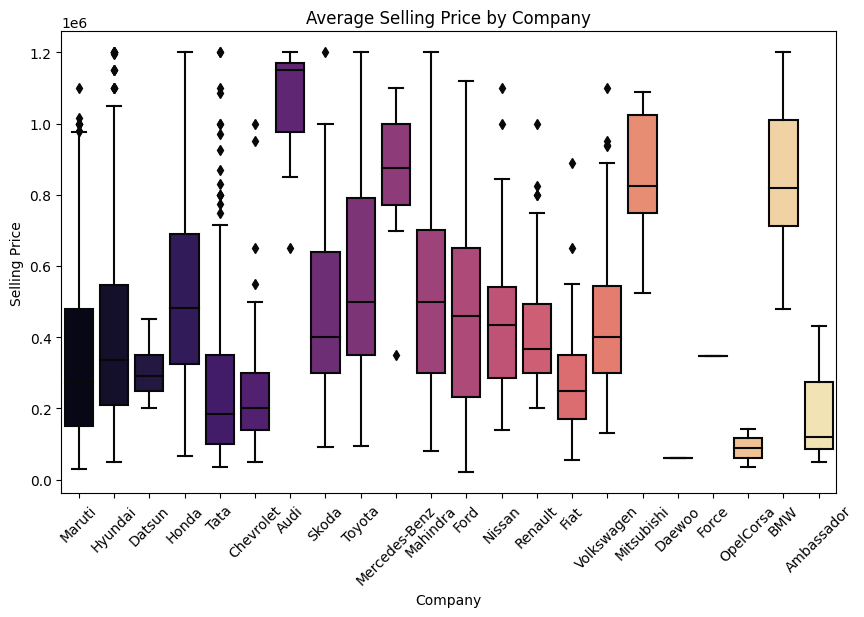

In [29]:
# Ploting Average Selling price with respect to Company name
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='selling_price', data=Data,palette = 'magma')
plt.title('Average Selling Price by Company')
plt.xlabel('Company')
plt.ylabel('Selling Price')
plt.xticks(rotation=45)
plt.show()

### Encoding Categorical Columns (fuel, seller_type, transmission, owner, Company)

In [30]:
columns_to_encode = ['fuel', 'seller_type', 'transmission', 'owner', 'Company']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the selected columns
for column in columns_to_encode:
    Data[column] = label_encoder.fit_transform(Data[column])
Data.sample(5)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Company
2481,2016,400000,80000,1,1,1,2,11
2086,2019,265000,40000,4,1,1,0,17
563,2005,150000,150000,1,1,1,0,3
1946,2017,280000,50000,4,1,1,0,17
1784,2018,850000,50000,1,1,1,0,12


### Utilizing LinearRegression

In [31]:
# Select features and target variable
features = ['fuel','seller_type','transmission','Company','km_driven', 'year','owner']
target = 'selling_price'

# Create feature matrix X and target vector y
X = Data[features]
y = Data[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 30321119868.56564


An MSE of approximately 30,321,119,868.57 means that, on average, the squared difference between the predicted selling prices and the actual selling prices is that value.

In [32]:
mse = 30321119868.56564

# Calculate Root Mean Squared Percentage Error (RMSPE)
actual_avg = np.mean(Data['selling_price'])
rmspe = np.sqrt(mse / actual_avg**2) * 100

print(f"Root Mean Squared Percentage Error (RMSPE): {rmspe}%")

Root Mean Squared Percentage Error (RMSPE): 44.434153986412134%


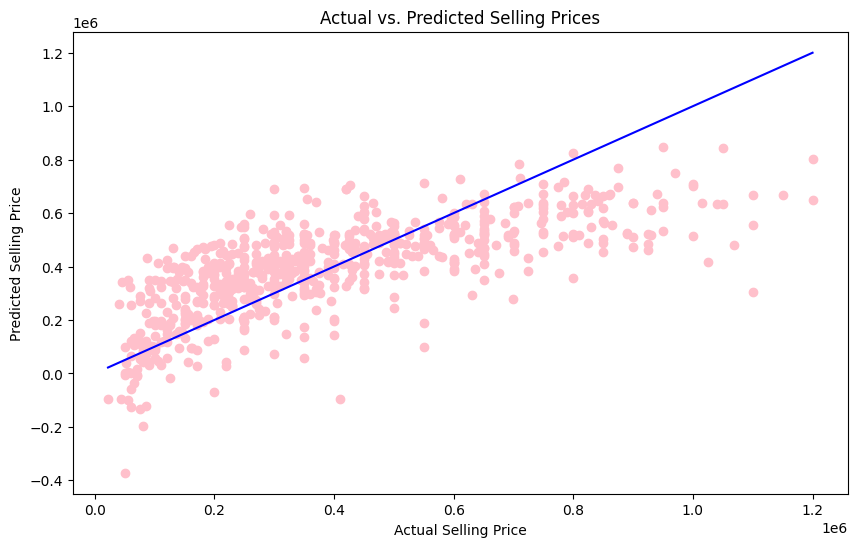

In [33]:
# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='pink')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='blue')
plt.title('Actual vs. Predicted Selling Prices')
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.show()


